<a class="anchor" id="lab-task-1"></a>
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong style="color:#FF5555">1. Lab Task: </strong> 
    <ol>       
        <li>Complete the <strong>Kafka Consumer</strong> in the file <code>LT1-Consumer.ipynb</code>. Here you are required address the following requirements:
       <ul>
           <li>Read the incoming data stream in the topic <strong>clickstream</strong></li>
           <li>Generate a real-time visualization showing <strong>total number of clicks and impressions for every instance received</strong></li>
            </ul>
    </ol>
</div>



<IPython.core.display.Javascript object>


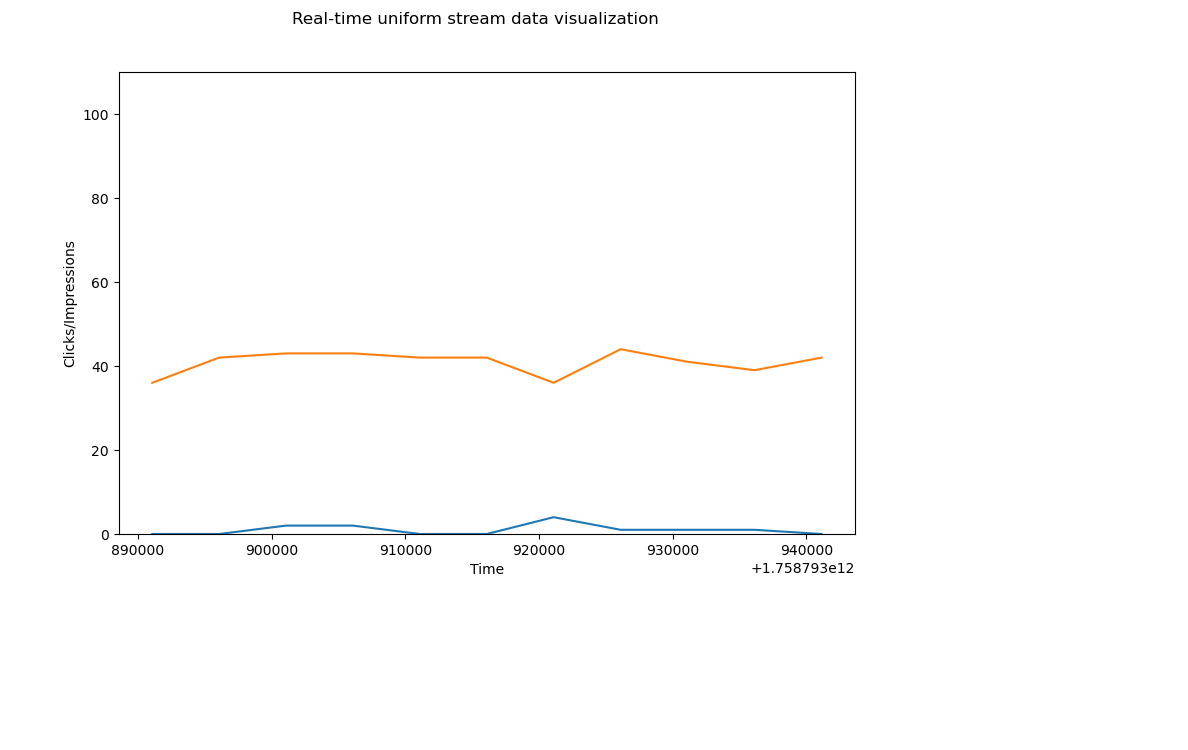

Timestamp: 1758792018962, Total Clicks: 3, Total Impressions: 36
Timestamp: 1758792023968, Total Clicks: 0, Total Impressions: 39
Timestamp: 1758792028974, Total Clicks: 0, Total Impressions: 52
Timestamp: 1758792033978, Total Clicks: 0, Total Impressions: 36
Timestamp: 1758792038985, Total Clicks: 0, Total Impressions: 31
Timestamp: 1758792043988, Total Clicks: 0, Total Impressions: 30
Timestamp: 1758792048994, Total Clicks: 1, Total Impressions: 37
Timestamp: 1758792054001, Total Clicks: 1, Total Impressions: 34
Timestamp: 1758792059008, Total Clicks: 2, Total Impressions: 37
Timestamp: 1758792064015, Total Clicks: 2, Total Impressions: 46
Timestamp: 1758792069020, Total Clicks: 0, Total Impressions: 41
Timestamp: 1758792074027, Total Clicks: 2, Total Impressions: 49
Timestamp: 1758792079035, Total Clicks: 1, Total Impressions: 39
Timestamp: 1758792084043, Total Clicks: 2, Total Impressions: 44
Timestamp: 1758792089051, Total Clicks: 0, Total Impressions: 37
Timestamp: 1758792094058,

Timestamp: 1758792654660, Total Clicks: 1, Total Impressions: 45
Timestamp: 1758792659663, Total Clicks: 2, Total Impressions: 43
Timestamp: 1758792664667, Total Clicks: 0, Total Impressions: 41
Timestamp: 1758792669673, Total Clicks: 0, Total Impressions: 41
Timestamp: 1758792674674, Total Clicks: 1, Total Impressions: 45
Timestamp: 1758792679679, Total Clicks: 0, Total Impressions: 39
Timestamp: 1758792684683, Total Clicks: 0, Total Impressions: 45
Timestamp: 1758792689687, Total Clicks: 0, Total Impressions: 26
Timestamp: 1758792694690, Total Clicks: 0, Total Impressions: 36
Timestamp: 1758792699697, Total Clicks: 0, Total Impressions: 40
Timestamp: 1758792704701, Total Clicks: 0, Total Impressions: 28
Timestamp: 1758792709707, Total Clicks: 1, Total Impressions: 36
Timestamp: 1758792714717, Total Clicks: 0, Total Impressions: 38
Timestamp: 1758792719719, Total Clicks: 2, Total Impressions: 40
Timestamp: 1758792724726, Total Clicks: 0, Total Impressions: 43
Timestamp: 1758792729729,

Timestamp: 1758793290423, Total Clicks: 0, Total Impressions: 39
Timestamp: 1758793295431, Total Clicks: 1, Total Impressions: 40
Timestamp: 1758793300439, Total Clicks: 0, Total Impressions: 45
Timestamp: 1758793305444, Total Clicks: 0, Total Impressions: 39
Timestamp: 1758793310452, Total Clicks: 0, Total Impressions: 34
Timestamp: 1758793315456, Total Clicks: 1, Total Impressions: 45
Timestamp: 1758793320460, Total Clicks: 1, Total Impressions: 47
Timestamp: 1758793325468, Total Clicks: 0, Total Impressions: 40
Timestamp: 1758793330475, Total Clicks: 0, Total Impressions: 44
Timestamp: 1758793335477, Total Clicks: 1, Total Impressions: 34
Timestamp: 1758793340483, Total Clicks: 2, Total Impressions: 36
Timestamp: 1758793345485, Total Clicks: 0, Total Impressions: 38
Timestamp: 1758793350489, Total Clicks: 0, Total Impressions: 47
Timestamp: 1758793355495, Total Clicks: 0, Total Impressions: 32
Timestamp: 1758793360502, Total Clicks: 2, Total Impressions: 43
Timestamp: 1758793365507,

Timestamp: 1758793926109, Total Clicks: 1, Total Impressions: 44
Timestamp: 1758793931116, Total Clicks: 1, Total Impressions: 41
Timestamp: 1758793936130, Total Clicks: 1, Total Impressions: 39
Timestamp: 1758793941137, Total Clicks: 0, Total Impressions: 42
Timestamp: 1758793946144, Total Clicks: 1, Total Impressions: 39


In [ ]:
# import statements
from time import sleep
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'clickstream'
hostip = "10.192.89.180" #change this to your IP address

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')        
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y1, y2 = [], [], []        
        for message in consumer:   
            #WRITE THE CODE BELOW
            total_clicks = 0
            total_impressions = 0
            data = message[6]['data']
            #access the "clicks" and "impressions" sent from the producer
            for item in data:
                clicks = item['Clicks']
                impressions = item['Impressions']
                total_clicks = total_clicks + int(clicks)
                total_impressions = total_impressions + int(impressions)
                
            #access the "timestamp"
            timestamp = message[3]
            #get the total clicks for the number of rows 
            #get the total impressions for the number of rows
            #append to X and Y respectively
            x.append(timestamp)
            y1.append(total_clicks)
            y2.append(total_impressions)
            print(f"Timestamp: {timestamp}, Total Clicks: {total_clicks}, Total Impressions: {total_impressions}")
            #visualize and update the graph
            if len(x) > 10:
                ax.clear()
                ax.plot(x, y1)
                ax.plot(x, y2)
                ax.set_xlabel('Time')
                ax.set_ylabel('Clicks/Impressions')
                ax.set_ylim(0,110) 
                ax.set_yticks([0,20,40,60,80,100])
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y1.pop(0)
                y2.pop(0)
            
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)        
    

In [2]:
!pip uninstall matplotlib --yes

Found existing installation: matplotlib 3.3.2
Uninstalling matplotlib-3.3.2:
  Successfully uninstalled matplotlib-3.3.2


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.3.2-cp38-cp38-manylinux1_x86_64.whl (11.6 MB)
